In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import scipy.io
mat = scipy.io.loadmat('drive/MyDrive/final data set matlab/final_first1.mat')

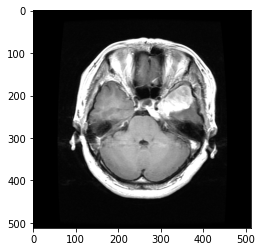

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(mat['img'],cmap='gray')

In [ ]:
import os
p=os.listdir('drive/MyDrive/final data set matlab')
images=[]
labels=[]


In [ ]:
for i in p:
  mat = scipy.io.loadmat('/drive/My Drive/final data set matlab/'+i)
  images.append(mat['img'])
  labels.append((mat['label'])[0][0])

In [ ]:
os.listdir("drive/MyDrive/images.npy")

NotADirectoryError: ignored

In [ ]:
import numpy as np
labels = np.array(labels)
images = np.array(images)
np.save('/content/drive/MyDrive/labels.npy', labels)
np.save('/content/drive/MyDrive/images.npy', images)

NameError: ignored

In [ ]:
import numpy as np
a=np.load('/content/drive/MyDrive/images.npy', allow_pickle=True)

In [ ]:
a.shape

(3064,)

In [ ]:
a[0]

array([[-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       ...,
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768]], dtype=int16)

In [ ]:
np.unique(a[0])

array([-32768, -32728, -32688, ...,  32687,  32727,  32767], dtype=int16)

In [ ]:
from keras.applications.vgg19 import VGG19
# load model
model = VGG19()
# summarize the model
model.summary()

574717952/574710816 [==============================] - 8s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [ ]:
#data=np.load('drive/My Drive/images.npy', allow_pickle=True)
labels=np.load('drive/My Drive/labels.npy', allow_pickle=True)

In [ ]:
labels.shape

(3064,)

In [ ]:
#a[0]=a[0].reshape(65536,2,2)

In [ ]:
#a[1]=a[1].reshape(65536,2,2)

In [ ]:
#a=np.resize(a,(3064,65536,2,2))

In [ ]:
from tensorflow.keras.applications.vgg19 import preprocess_input,decode_predictions
for i in range(2030):
  a[i]=a[i].flatten()
  a[i]=a[i][:261075]
  a[i]=a[i].reshape((295,295,3))
  a[i]=preprocess_input(a[i])

In [ ]:
a.shape

(3064,)

In [ ]:
from keras import Sequential
#importing other required libraries
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.applications import VGG19, VGG16, ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten, Dense, BatchNormalization, Activation,Dropout
from keras.utils import to_categorical
import tensorflow as tf
import random

base_model_VGG19 = VGG19(include_top=False, weights='imagenet', input_shape=(224,224,3))

model_vgg19 = Sequential()
model_vgg19.add(base_model_VGG19) 
model_vgg19.add(Flatten()) 
model_vgg19.add(Dense(1024,activation=('relu'),input_dim=512))
model_vgg19.add(Dense(512,activation=('relu'))) 
model_vgg19.add(Dense(256,activation=('relu'))) 
#model_vgg19.add(Dropout(.3))
model_vgg19.add(Dense(128,activation=('relu')))
#model_vgg19.add(Dropout(.2))
model_vgg19.add(Dense(2,activation=('softmax')))

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
#Defining the hyperparameters
batch_size= 100
epochs=50
learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)

#Compiling the VGG19 model
model_vgg19.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
(x_train, x_val, trainY, testY) = train_test_split(a[:2030], labels[:2030],
	test_size=0.20, random_state=42)
trainY=to_categorical(trainY)
testY=to_categorical(testY)

In [ ]:
#Image Data Augmentation
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

# test_generator = ImageDataGenerator(rotation_range=2,  horizontal_flip= True, zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
# test_generator.fit(x_test)

ValueError: ignored

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
for i in range(3064):
    a[i]=preprocess_input(a[i])

ValueError: ignored

In [ ]:
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01,  patience=3, min_lr=1e-5)


In [ ]:
model_vgg19.fit_generator(train_generator.flow(x_train, trainY, batch_size = 16), epochs=10, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generator.flow(x_val, testY, batch_size = 16), callbacks = [lrr], verbose = 1)

ValueError: ignored

In [ ]:
import os
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

data = []
labels = []

yesimages="/content/drive/My Drive/brain_tumor_dataset/yes/"

for i in os.listdir(yesimages):
	
    path=yesimages+i

	
    image = load_img(path, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)

	
    data.append(image)
    labels.append(1)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


KeyboardInterrupt: ignored

In [ ]:
noimages="/content/drive/My Drive/brain_tumor_dataset/no/"

for i in os.listdir(noimages):
	
    path=noimages+i

	
    image = load_img(path, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)

	
    data.append(image)
    labels.append(0)

In [ ]:
import numpy as np
data = np.array(data)
labels = np.array(labels)


In [ ]:
data.shape

(253, 224, 224, 3)

In [ ]:
from keras import Sequential
#importing other required libraries
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.applications import VGG19, VGG16, ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten, Dense, BatchNormalization, Activation,Dropout
from keras.utils import to_categorical
import tensorflow as tf
import random

base_model_VGG19 = VGG19(include_top=False, weights='imagenet', input_shape=(224,224,3))

model_vgg19 = Sequential()
model_vgg19.add(base_model_VGG19) 
model_vgg19.add(Flatten()) 
model_vgg19.add(Dense(1024,activation=('relu'),input_dim=512))
model_vgg19.add(Dense(512,activation=('relu'))) 
model_vgg19.add(Dense(256,activation=('relu'))) 
#model_vgg19.add(Dropout(.3))
model_vgg19.add(Dense(128,activation=('relu')))
#model_vgg19.add(Dropout(.2))
model_vgg19.add(Dense(2,activation=('softmax')))

In [ ]:
print(model.summary())

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
#Defining the hyperparameters
batch_size= 100
epochs=50
learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)

#Compiling the VGG19 model
model_vgg19.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
(x_train, x_val, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)
trainY=to_categorical(trainY)
testY=to_categorical(testY)

In [ ]:
#Image Data Augmentation
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

# test_generator = ImageDataGenerator(rotation_range=2,  horizontal_flip= True, zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
# test_generator.fit(x_test)

In [ ]:
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01,  patience=3, min_lr=1e-5)

aug = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,fill_mode="nearest")
H = model_vgg19.fit(
	aug.flow(x_train, trainY, batch_size=23),
	steps_per_epoch=len(x_train)//23 ,
	validation_data=(x_val, testY),
	validation_steps=len(x_val)//23 ,
	epochs=10,callbacks=[lrr])

Epoch 1/10
8/8 [==============================] - 4s 445ms/step - loss: nan - accuracy: 0.3799 - val_loss: nan - val_accuracy: 0.3922
Epoch 2/10
8/8 [==============================] - 3s 421ms/step - loss: nan - accuracy: 0.3967 - val_loss: nan - val_accuracy: 0.3922
Epoch 3/10
8/8 [==============================] - 3s 415ms/step - loss: nan - accuracy: 0.3911 - val_loss: nan - val_accuracy: 0.3922
Epoch 4/10
8/8 [==============================] - 3s 420ms/step - loss: nan - accuracy: 0.4130 - val_loss: nan - val_accuracy: 0.3922
Epoch 5/10
8/8 [==============================] - 3s 417ms/step - loss: nan - accuracy: 0.3743 - val_loss: nan - val_accuracy: 0.3922
Epoch 6/10
8/8 [==============================] - 3s 416ms/step - loss: nan - accuracy: 0.3631 - val_loss: nan - val_accuracy: 0.3922
Epoch 7/10
8/8 [==============================] - 3s 415ms/step - loss: nan - accuracy: 0.3743 - val_loss: nan - val_accuracy: 0.3922
Epoch 8/10
8/8 [==============================] - 3s 418ms/ste

In [ ]:
trainY.shape

(202,)